In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

### Gasoline Prices 

In [2]:
gasoline_prices = pd.read_csv("datathon data/weekly_gasoline_prices.csv")

In [ ]:
## 7 days intervals 
gasoline_prices['Type_Clean'].value_counts()

Type_Clean
Regular Conventional Retail Gasoline Prices              37560
Regular Reformulated Retail Gasoline Prices              37560
Regular All Formulations Retail Gasoline Prices          37560
Midgrade Conventional Retail Gasoline Prices             37560
Midgrade Reformulated Retail Gasoline Prices             37560
Midgrade All Formulations Retail Gasoline Prices         37560
Premium Conventional Retail Gasoline Prices              37560
Premium Reformulated Retail Gasoline Prices              37560
Premium All Formulations Retail Gasoline Prices          37560
All Grades Conventional Retail Gasoline Prices           37560
All Grades Reformulated Retail Gasoline Prices           37560
All Grades All Formulations Retail Gasoline Prices       37560
No 2 Diesel Retail Prices                                37560
No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail Prices    26460
Name: count, dtype: int64

In [23]:
gasoline_prices
# from Jan 03, 2000 to Dec 25, 2023

,Date,Year,Type,Type_Clean,Unit,Geography,Price
0,"Jan 03, 2000",2000,Regular Conventional Retail Gasoline Prices (...,Regular Conventional Retail Gasoline Prices,Dollars per Gallon,US,1.260
1,"Jan 10, 2000",2000,Regular Conventional Retail Gasoline Prices (...,Regular Conventional Retail Gasoline Prices,Dollars per Gallon,US,1.252
2,"Jan 17, 2000",2000,Regular Conventional Retail Gasoline Prices (...,Regular Conventional Retail Gasoline Prices,Dollars per Gallon,US,1.268
3,"Jan 24, 2000",2000,Regular Conventional Retail Gasoline Prices (...,Regular Conventional Retail Gasoline Prices,Dollars per Gallon,US,1.307
4,"Jan 31, 2000",2000,Regular Conventional Retail Gasoline Prices (...,Regular Conventional Retail Gasoline Prices,Dollars per Gallon,US,1.307
...,...,...,...,...,...,...,...
514735,"Nov 27, 2023",2023,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,Dollars per Gallon,West Coast (PADD 5) Except California,4.490
514736,"Dec 4, 2023",2023,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,Dollars per Gallon,West Coast (PADD 5) Except California,4.418
514737,"Dec 11, 2023",2023,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,Dollars per Gallon,West Coast (PADD 5) Except California,4.310
514738,"Dec 18, 2023",2023,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...,Dollars per Gallon,West Coast (PADD 5) Except California,4.153


### All Stocks and ETF

In [ ]:
stocks  = pd.read_csv("datathon data/all_stocks_and_etfs.csv")

In [ ]:
stocks.groupby("Ticker_Symbol")['Date-Time'].min()
# form different years to 2024-01-25 the same ending date 
# days intervals 

Ticker_Symbol
BKR     2017-07-05
BP      1999-11-01
BPT     1999-11-01
CEO     2001-02-27
CHK     2021-02-10
COP     1999-11-01
CVX     1999-11-01
DIA     1999-11-01
DVN     1999-11-01
E       1999-11-01
EOG     1999-11-01
EPD     1999-11-01
EXC     1999-11-01
FANG    2012-10-12
HAL     1999-11-01
HES     1999-11-01
KMI     2011-02-11
MPC     2011-06-23
NOV     1999-11-01
ONEQ    2003-10-01
OXY     1999-11-01
PSX     2012-04-12
SLB     1999-11-01
SPY     1999-11-01
VLO     1999-11-01
VOO     2010-09-09
WMB     1999-11-01
XOM     1999-11-01
Name: Date-Time, dtype: object

### Monthly Gasoline Makeup Percentage

In [19]:
makeup = pd.read_csv("datathon data/monthly_gasoline_makeup_percentages.csv")

### Weekly Supply Estimate

In [20]:
supply = pd.read_csv("datathon data/weekly_supply_estimates.csv")

### Weekly Supply from Crude Oil Commodities

In [21]:
commodity = pd.read_csv("datathon data/all_commodities.csv")

In [22]:
commodity[commodity['Commodity_Simple'] == 'WTI']

,Date_Time,Value,Commodity,Commodity_Simple,Unit
7061,2024-01-22,75.26,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7062,2024-01-19,73.69,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7063,2024-01-18,74.32,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7064,2024-01-17,72.79,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7065,2024-01-16,72.63,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
...,...,...,...,...,...
16984,1986-01-08,25.87,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16985,1986-01-07,25.85,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16986,1986-01-06,26.53,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16987,1986-01-03,26.00,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel


## Crude to Gasoline Pricing Dynamics

Relevant Data:
- Regular All Formulations Gas Price in the US (per week)
- commodities (per days - weekly intervals)
- Composition (make up percentage weekly)

In [ ]:
regular_formulated_gas_prices = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular All Formulations Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_formulated_gas_prices['Date'] = pd.to_datetime(regular_formulated_gas_prices['Date'])
regular_formulated_gas_prices.to_csv("datathon data/gas_prices/regular_formulated_gas_prices.csv", index=False)

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_5406/3092934221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_formulated_gas_prices['Date'] = pd.to_datetime(regular_formulated_gas_prices['Date'])


Text(0.5, 1.0, 'Regular All Formulations Retail Gasoline Prices in the US')

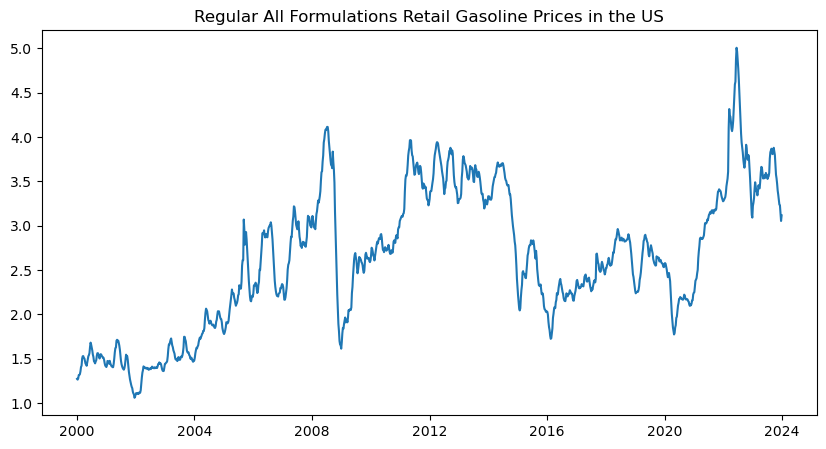

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(regular_formulated_gas_prices['Date'], regular_formulated_gas_prices['Price'])
plt.title('Regular All Formulations Retail Gasoline Prices in the US')

In [ ]:
regular_conventional_gas_prices = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular Conventional Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_conventional_gas_prices['Date'] = pd.to_datetime(regular_conventional_gas_prices['Date'])
regular_conventional_gas_prices.to_csv("datathon data/gas_prices/regular_conventional_gas_prices.csv", index=False)

regular_reformulated_gas_price = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular Reformulated Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_reformulated_gas_price['Date'] = pd.to_datetime(regular_reformulated_gas_price['Date'])
regular_reformulated_gas_price.to_csv("datathon data/gas_prices/regular_reformulated_gas_prices.csv", index=False)

regular_combined_gas_prices_df = regular_formulated_gas_prices.merge(regular_conventional_gas_prices, on='Date', how='inner').merge(regular_reformulated_gas_price, on='Date', how='inner')
regular_combined_gas_prices_df.to_csv("datathon data/gas_prices/regular_combined_gas_prices.csv", index=False)
regular_combined_gas_prices = regular_combined_gas_prices_df[['Date', 'Price_x', 'Price_y', 'Price', 'Type_Clean_x', 'Type_Clean_y', 'Type_Clean']]
regular_combined_gas_prices.rename(columns={'Price_x': 'All Formulations Price',
                                            'Price_y': 'Conventional Price',
                                            'Price': 'Reformulated Price',
                                            'Type_Clean_x': 'All Formulations',
                                            'Type_Clean_y': 'Conventional',
                                            'Type_Clean': 'Reformulated'}, inplace=True)

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_5406/3829483252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_conventional_gas_prices['Date'] = pd.to_datetime(regular_conventional_gas_prices['Date'])
/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_5406/3829483252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_reformulated_gas_price['Date'] = pd.to_datetime(regular_reformulated_gas_price['Date'])


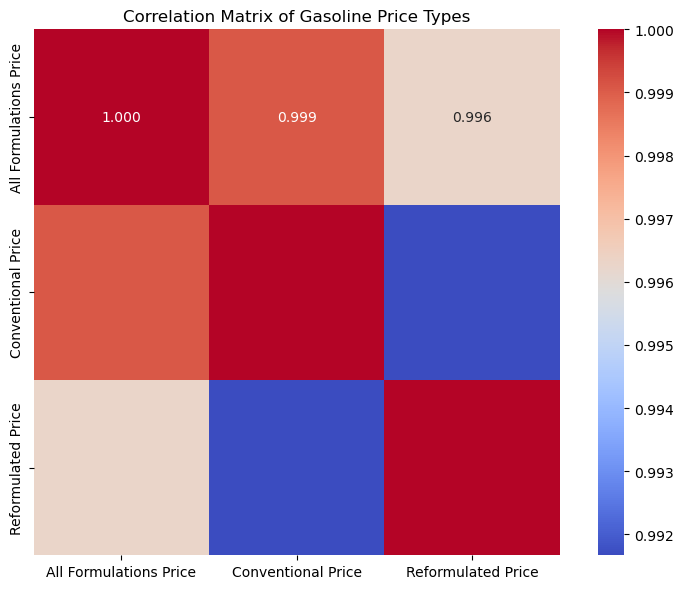

,All Formulations Price,Conventional Price,Reformulated Price
All Formulations Price,1.000000,0.999085,0.996264
Conventional Price,0.999085,1.000000,0.991667
Reformulated Price,0.996264,0.991667,1.000000


In [ ]:
# from this we can see that the prices are closely related to each other, 
# and thus we only discuss all formuated prices in the follow analysis 
correlation_matrix = regular_combined_gas_prices[['All Formulations Price','Conventional Price','Reformulated Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title("Correlation Matrix of Gasoline Price Types")
plt.tight_layout()
plt.show()
correlation_matrix

In [78]:
regular_formulated_gas_prices

,Date,Year,Type,Type_Clean,Unit,Geography,Price
2504,2000-01-03,2000,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,1.272
2505,2000-01-10,2000,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,1.264
2506,2000-01-17,2000,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,1.277
2507,2000-01-24,2000,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,1.315
2508,2000-01-31,2000,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,1.316
...,...,...,...,...,...,...,...
3751,2023-11-27,2023,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,3.238
3752,2023-12-04,2023,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,3.231
3753,2023-12-11,2023,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,3.136
3754,2023-12-18,2023,Regular All Formulations Retail Gasoline Price...,Regular All Formulations Retail Gasoline Prices,Dollars per Gallon,US,3.053


In [ ]:
WFI.isna().sum() # na for 324
BRENT.isna().sum() # na for 262

Date                  0
Price               262
Commodity             0
Commodity_Simple      0
Unit                  0
dtype: int64

In [87]:
WFI = commodity[commodity['Commodity_Simple'] == 'WTI'].rename(columns={'Date_Time': 'Date', 'Value': 'Price'})
WFI['Date'] = pd.to_datetime(WFI['Date'])  # convert to datetime
WFI.to_csv("datathon data/crude_oil/WFI.csv", index=False)

BRENT = commodity[commodity['Commodity_Simple'] == 'BRENT'].rename(columns={'Date_Time': 'Date', 'Value': 'Price'})
BRENT['Date'] = pd.to_datetime(BRENT['Date'])  # convert to datetime
BRENT.to_csv("datathon data/crude_oil/BRENT.csv", index=False)


In [88]:
WFI

,Date,Price,Commodity,Commodity_Simple,Unit
7061,2024-01-22,75.26,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7062,2024-01-19,73.69,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7063,2024-01-18,74.32,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7064,2024-01-17,72.79,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
7065,2024-01-16,72.63,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
...,...,...,...,...,...
16984,1986-01-08,25.87,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16985,1986-01-07,25.85,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16986,1986-01-06,26.53,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel
16987,1986-01-03,26.00,West Texas Intermediary Crude Oil,WTI,Dollars per Barrel


In [108]:
WFI_sampled['Date'].describe()

count                   1252
mean     2011-12-29 12:00:00
min      2000-01-03 00:00:00
25%      2005-12-31 06:00:00
50%      2011-12-29 12:00:00
75%      2017-12-26 18:00:00
max      2023-12-25 00:00:00
Name: Date, dtype: object

In [ ]:
## Sample one date from each week
WFI_sampled = WFI[WFI['Date'].isin(regular_formulated_gas_prices['Date'])] #na for 129

# Get the average price for each week 
WFI_averaged_df = WFI.resample('W-MON', on='Date')['Price'].mean().reset_index() #na for 0

# Get the maximum and minimum price for each week
WFI_max_df =  WFI.resample('W-MON', on='Date')['Price'].max().reset_index() #na for 0
WFI_min_df =  WFI.resample('W-MON', on='Date')['Price'].min().reset_index() #na for 0

print(f"{len(WFI_sampled), len(WFI_averaged_df), len(WFI_max_df), len(WFI_min_df)}")

min_date = "2000-01-03"
max_date = "2023-12-25"

WFI_min = WFI_min_df[(WFI_min_df['Date']>= min_date) & (WFI_min_df['Date'] <= max_date)]
WFI_averaged = WFI_averaged_df[(WFI_averaged_df['Date']>= min_date) & (WFI_averaged_df['Date'] <= max_date)]
WFI_max = WFI_max_df[(WFI_max_df['Date']>= min_date) & (WFI_max_df['Date'] <= max_date)]

print(f"{len(WFI_sampled), len(WFI_averaged), len(WFI_max), len(WFI_min)}")

(1252, 1986, 1986, 1986)
(1252, 626, 626, 626)
